## Support Vector Classifier Implementation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
## Creating some synthetic data points

from sklearn.datasets import make_classification


In [4]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2
                        ,n_clusters_per_class=1,n_redundant=0)

In [5]:
X

array([[-0.67592063, -1.97488775],
       [-1.31988774,  1.06032902],
       [-1.32553137,  1.15930685],
       ...,
       [-1.90404805, -3.00209724],
       [-0.91724136,  1.20983765],
       [-1.13509675,  0.94362529]])

In [6]:
y

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [9]:
pd.DataFrame(X)

,0,1
0,-0.675921,-1.974888
1,-1.319888,1.060329
2,-1.325531,1.159307
3,-1.367147,-1.850846
4,-1.780803,1.132437
...,...,...
995,-0.715350,-1.111206
996,-0.774813,1.113268
997,-1.904048,-3.002097
998,-0.917241,1.209838


In [10]:
pd.DataFrame(X)[0]

0     -0.675921
1     -1.319888
2     -1.325531
3     -1.367147
4     -1.780803
         ...   
995   -0.715350
996   -0.774813
997   -1.904048
998   -0.917241
999   -1.135097
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

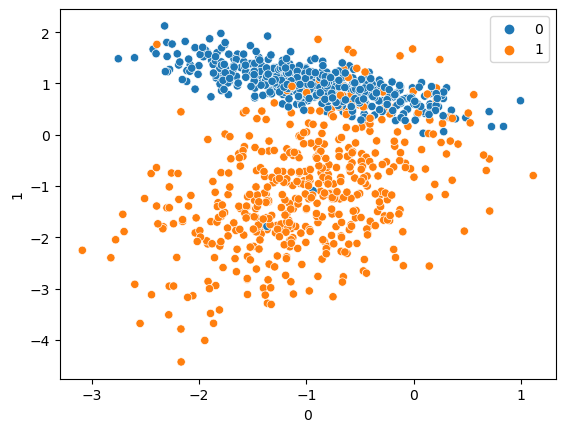

In [15]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [20]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [21]:
## use SVC  linear

from sklearn.svm import SVC

In [22]:
svc=SVC(kernel='linear')

In [23]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [24]:
## predictions

y_pred=svc.predict(X_test)

In [25]:
##Peformance metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       127
           1       0.99      0.87      0.93       123

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250



In [26]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[126   1]
 [ 16 107]]


In [27]:
score=accuracy_score(y_test,y_pred)
print(score)

0.932


In [64]:
svc.coef_

array([[-0.45856188, -2.48056904]])

In [35]:
## Lets make data again using n_clusters_per_class=2

X,y=make_classification(n_samples=1000,n_features=2,n_classes=2
                        ,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

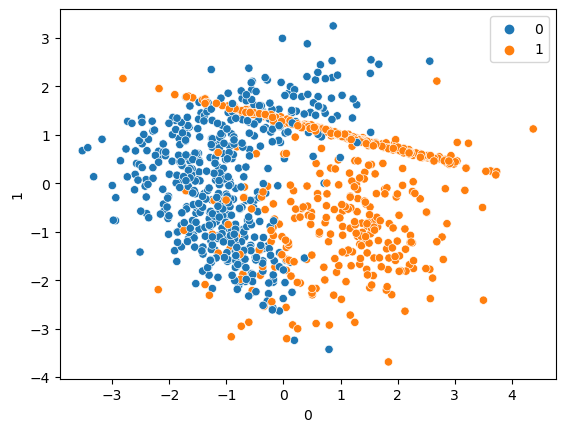

In [36]:
## check sccuracy of this data
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [37]:
svc1=SVC(kernel='linear')
svc1.fit(X_train,y_train)
y_pred1=svc1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       127
           1       0.99      0.87      0.93       123

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250



In [38]:
score=accuracy_score(y_test,y_pred1)
print(score)

0.932


In [39]:
## Using rbf kernel, you can try with other kernels
rbf=SVC(kernel='rbf')

In [49]:
rbf.fit(X_train,y_train)

SVC()

In [50]:

y_pred2=rbf.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       127
           1       0.99      0.87      0.93       123

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.94      0.93      0.93       250



In [54]:
score3=accuracy_score(y_test,y_pred2)
print(score3)

0.932


## Hyperparameter tuning

In [55]:
## Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1,1,10,100,1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']}

In [58]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,refit=True)

In [59]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [60]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [62]:
## predictions
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       127
           1       0.99      0.89      0.94       123

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250

[[126   1]
 [ 13 110]]


In [67]:
grid.best_score_

0.9453333333333334